# Holly's Lab 3



## Load Packages

In [3]:
library(tidyverse)

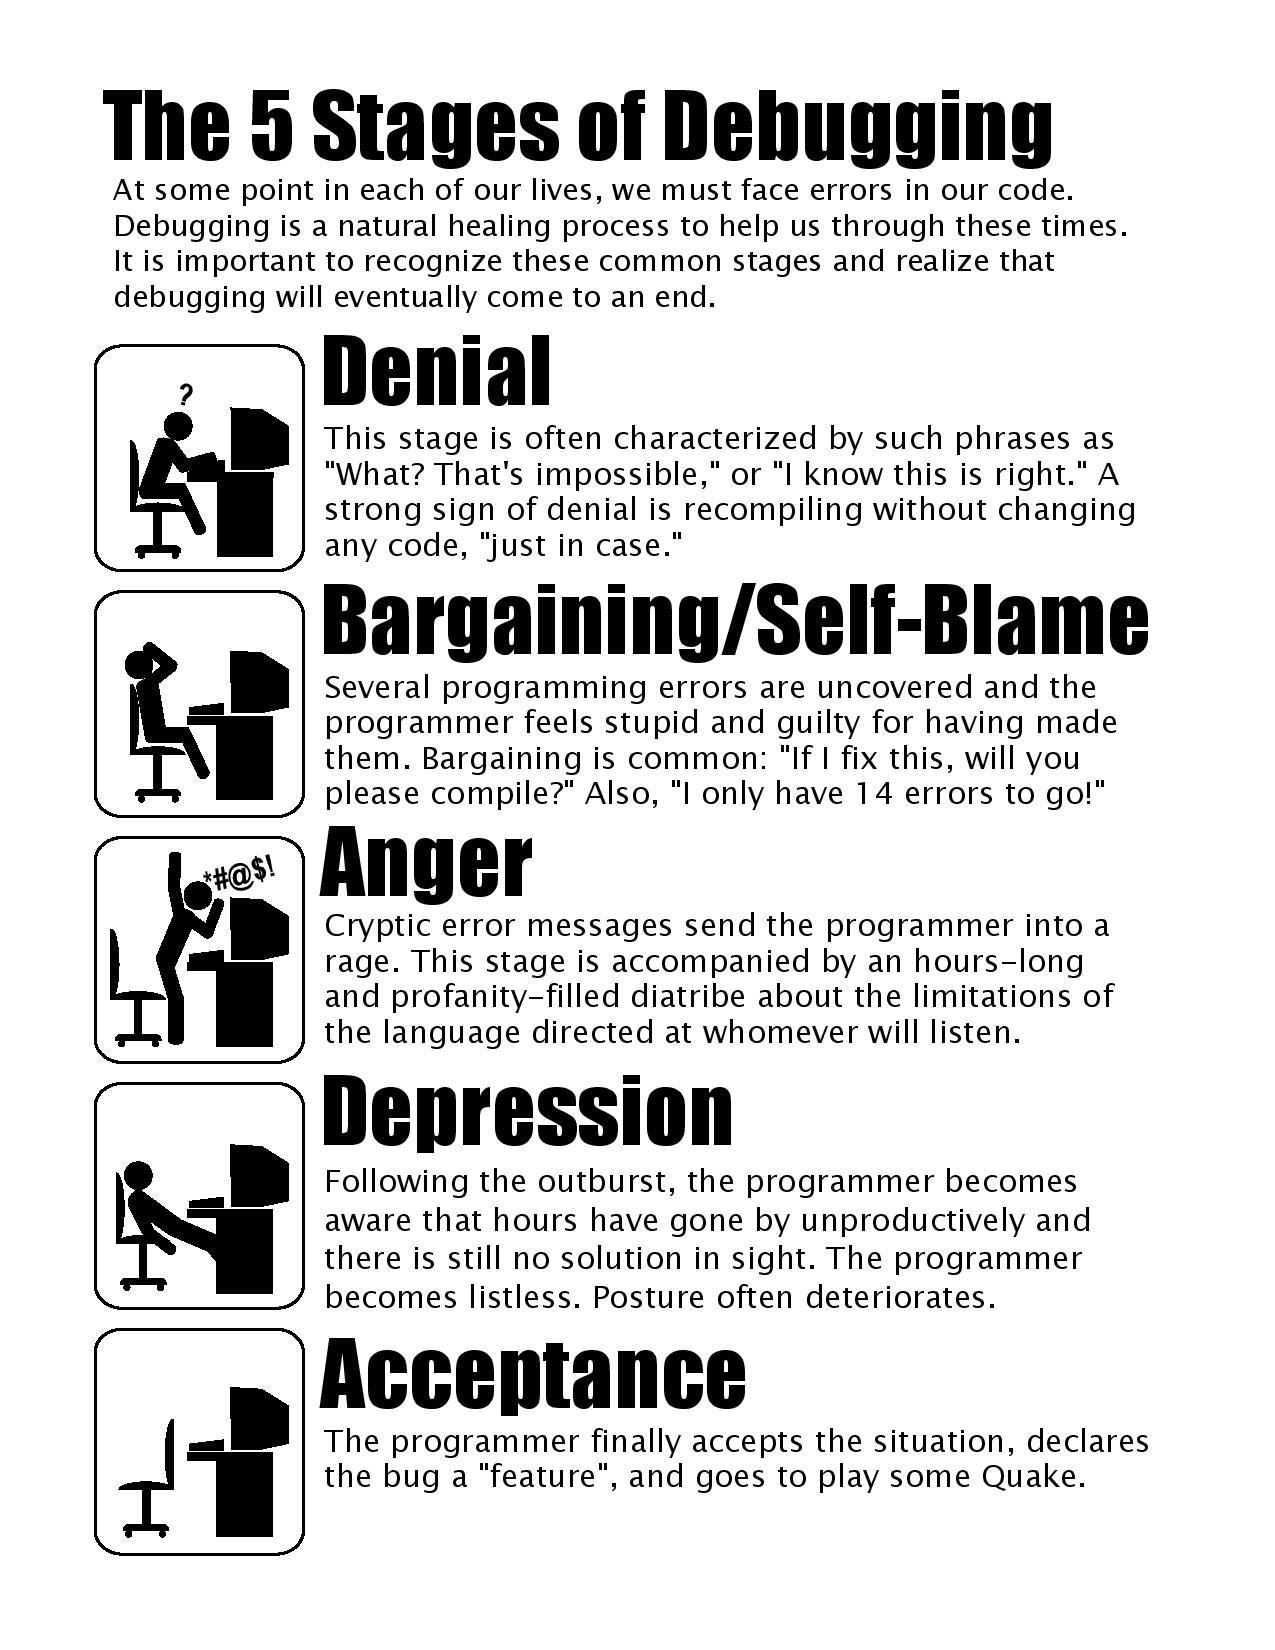

In [ ]:
head(starwars)
?starwars

## Quick Review:

**dplyr basics**

Which of the 5 key dplyr verb functions:
*    Narrows down observations by their values?
*    Reorders the rows of the dataset?
*    Returns a dataset with less columns, or columns in a different order?
*    Creates new features (variables) calculated from current columns?
*    Allows us to look at values related to groups, or subsets of the data?

**Review Problems**

1) In the starwars dataset, organize the human characters by the year they were born.

2) Reproduce the following tibble:

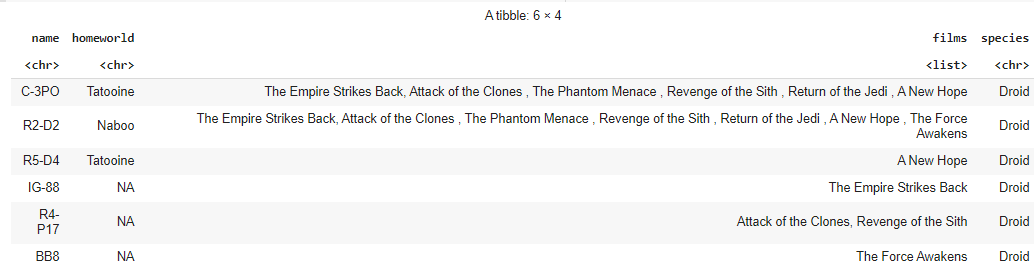

3) Create a new column which ranks the characters by height. The tallest character should be number 1. Show only the columns with their name, their height and their height rank. Arrange by height rank. (hint: min_rank() gives smallest ranks to smallest values.)

## Summaries

summaraize can be used to summarize entire data frames by colapsing them into single number summaries. 

In [ ]:
summarize(starwars, mass = mean(mass, na.rm = TRUE)) 
#this data set has lots of missing values which will mess up the calculations..
#(if we don't know all the values, the mean, sum, whatever we are trying to find, is also unknown)
# I removed them using the na.rm = TRUE

Most often, summarize is more helpful when it is combinded with the group_by() function.

In [ ]:
by_species <- group_by(starwars, species)
(species_weights <- summarize(by_species, avg_mass = mean(mass, na.rm = TRUE)))

## Piping

All of our review problems, and this last example required multiple steps. Up to now, we had two options, either nesting (calling one function inside of another) or using variables to save the results, and calling a result inside of another. Neither of these options are very sleak or condensed. Piping is a better way; it saves memory, and doesn't clutter our environment with unecessary variables.

When we work with pipes we break our process into steps, and call each step one at a time, with a pipe %>% placing one step into the next one. Just like when we used the + to add different parts of our graphs with ggplot() when we use piping we must make sure we end the line with the pipe to tell R that we are not done yet.

In [ ]:
starwars %>%                                    #step1, call the dataset.
group_by(species) %>%                           #step 2 groupby species.
summarize(avg_mass = mean(mass, na.rm = TRUE))  #step 3 summarieze

Pipes come from the magittr package in tidyverse. 

Pipes start at the inside of a nested function, or with step one of a process. It evaluates, and pushes the result down the pipe to the next process. If you send something down the pipe into a function, if will by default place it as the first argument in the function.

`x %>% f(y)` is the same as calling `f(x,y)` not `f(y,x)`.

Note if you want `f(y,x)` you can call `x %>% f(y,.)` where the "." tells the pipe where to place the next function.


Piping works with all tidyverse packages except inside ggplot... (use `+` instead)
However you can pipe a plot at the end...




In [ ]:
starwars %>%                                    
  group_by(species) %>%                           
  summarize(avg_mass = mean(mass, na.rm = TRUE)) %>%
  filter(!is.na(avg_mass) & !is.na(species)) %>%
  ggplot() +
    geom_bar(mapping = aes(x=avg_mass, y = species), stat = 'identity') +
    labs(x="Average Species Mass", y='Species')


**CHALLENGE:** Redo the review problems, this time using pipes.

1) In the starwars dataset, organize the human characters by the year they were born.

2) Reproduce the following tibble:

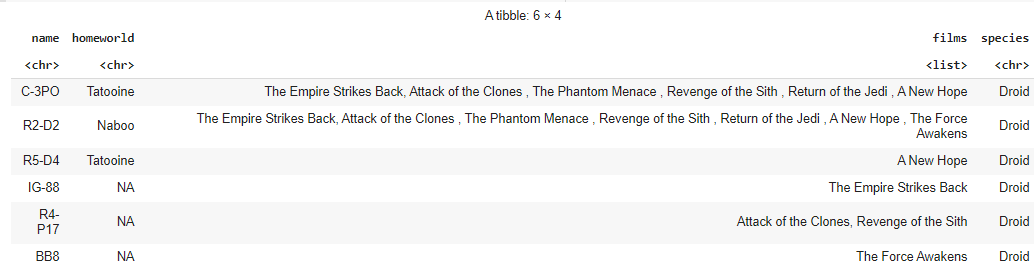

3) Rank the characters by height. The tallest character should be number 1. Show only the columns with their name, their height and their height rank. Arrange by height rank.

## Counts and other useful summary functions

When we group by and summarize, it is often helpful to have a count of items ( n() ), or a count of not null items ( sum(!is.na(x)) ). 

In [ ]:
starwars %>%                                    
  group_by(species) %>%                          
  summarize(count = n(),
            avg_mass = mean(mass, na.rm = TRUE))  %>%
  filter(count > 1) %>%
  arrange(desc(avg_mass))

**USEFUL SUMMARY FUCNTIONS**

*   Counts: n()- total, sum(!is.na(x)) -total not NA, n_distinct() -count of distinct values.
*   MMeasures of center: mean(), median()
*   sum()
*   Measures of spread: sd(), IQR(), mad()- meadian absoluted deviation.
*   Measures of rank: min(), max(), quantile()
*   Measures of position: first(), nth(), last()
*   Conditional counts and proportions: sum(x > 10), mean(y==0)

Examples: 

The proportion of characters from Tatooine that are human.

In [ ]:
starwars %>%
  filter(homeworld == 'Tatooine') %>%
  summarise(prop_human = mean(species == 'Human'))

5 Number summary of starwars humans' masses by sex.

In [ ]:
starwars %>%
  filter(species == 'Human' ) %>%
  filter(!is.na(mass))%>%   ##could of combinded these two steps
  group_by(sex) %>%
  summarize(count = n(),
            min = min(mass),
            Q1 = quantile(mass, .25),
            median = median(mass),
            Q3 = quantile(mass, .75),
            max = max(mass))

**CHALLENGE** 

Find the number of the distinct homeworlds humans are from in the starwars dataset. 


**Summarize by multiple variables**

Sometimes it is useful to group_by multiple variables, i.e. month/day/year


In [ ]:
starwars %>%
  group_by(species, homeworld) %>%
  summarise(count = n()) %>%
  filter(count > 1)

## `group_by()` and our other functions

**`group_by()` and `filter()`**

group_by and filter allows us to find the best/worst members of a group, or only members of a group that fit a certain category.

In [ ]:
starwars %>%
  group_by(homeworld) %>%
  filter(n() > 2 & !is.na(homeworld)) %>%
  select(homeworld, name, species, mass, height, sex) %>%
  arrange(homeworld, name)

**`group_by()` and `mutate()`**

This allows us to compute a group metric for comparison.

In [ ]:
starwars %>%
  group_by(species) %>%
  filter(!is.na(mass) & n() >2 & !is.na(species)) %>%
  mutate(mean_mass = mean(mass)) %>%
  select(name, species, mass, mean_mass) %>%
  arrange(species, name)

**CHALLENGE** Convert the heights from cm to inches (1 cm = 0.3937 inches) and find the average height for each species with more than 1 specimans in that species. Only show columns you think are relevant.

Often it is helpful to transform the data before we graph it:

Graph the heights of all starwars characters. Who is the tallest? What species is tallest?

In [ ]:
starwars %>% ggplot() +
    geom_bar(aes(x=name, y = height), stat='identity', fill='blue')+ 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
starwars %>%
    filter(!is.na(height)) %>% 
    arrange(desc(height)) %>%
    head() %>%
    ggplot() +
        geom_bar(aes(x=name, y = height), stat='identity', fill='blue')+ 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
starwars %>%
    filter(!is.na(height)) %>% 
    arrange(desc(height)) %>%
    head() %>%
    ggplot() +
        geom_bar(aes(x=reorder(name, -height), y = height), stat='identity', fill='blue')+ 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
starwars %>%
    filter(!is.na(height) & !is.na(species)) %>% 
    group_by(species) %>%
    summarize(av_height = mean(height)) %>%
    ggplot() +
        geom_bar(aes(x=species, y = av_height), stat='identity', fill='blue') + 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
starwars %>%
    filter(!is.na(height) & !is.na(species)) %>% 
    group_by(species) %>%
    filter(n() > 2) %>%
    summarize(av_height = mean(height)) %>%
    ggplot() +
        geom_bar(aes(x=species, y = av_height), stat='identity', fill='blue')

dplyr cheat sheet: https://4.files.edl.io/b9e2/07/12/19/142839-a23788fb-1d3a-4665-9dc4-33bfd442c296.pdf

Just like the ggplot cheat sheet, this has more on it, than we have covered, but everything we have covered is on here.

**CHALLENGE**


Come up with three questions about the starwars data set, and come up with visulizations and/or summaries to answer your questions.

In [ ]:
head(starwars)